In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Aggregation_df= pd.read_csv("/content/drive/MyDrive/ML data-s/lab5's data from dr khaled/Aggregation.txt", sep="\t", skiprows=7, header=None, names=['col1', 'col2', 'target'])
Compound_df= pd.read_csv("/content/drive/MyDrive/ML data-s/lab5's data from dr khaled/Compound.txt", sep="\t", skiprows=7, header=None, names=['col1', 'col2', 'target'])
D31_df= pd.read_csv("/content/drive/MyDrive/ML data-s/lab5's data from dr khaled/D31.txt", sep="\t", skiprows=7, header=None, names=['col1', 'col2', 'target'])
Flame_df= pd.read_csv("/content/drive/MyDrive/ML data-s/lab5's data from dr khaled/Flame.txt", sep="\t", skiprows=7, header=None, names=['col1', 'col2', 'target'])
Jain_df= pd.read_csv("/content/drive/MyDrive/ML data-s/lab5's data from dr khaled/Jain.txt", sep="\t", skiprows=7, header=None, names=['col1', 'col2', 'target'])
Pathbased_df= pd.read_csv("/content/drive/MyDrive/ML data-s/lab5's data from dr khaled/Pathbased.txt", sep="\t", skiprows=7, header=None, names=['col1', 'col2', 'target'])
R15_df= pd.read_csv("/content/drive/MyDrive/ML data-s/lab5's data from dr khaled/R15.txt", sep="\t", skiprows=7, header=None, names=['col1', 'col2', 'target'])
Spiral_df= pd.read_csv("/content/drive/MyDrive/ML data-s/lab5's data from dr khaled/Spiral.txt", sep="\t", skiprows=7, header=None, names=['col1', 'col2', 'target'])

In [ ]:
data_frames=[Aggregation_df,Compound_df,D31_df,Flame_df,Jain_df,Pathbased_df,R15_df,Spiral_df,Spiral_df]

In [ ]:
Spiral_df

,col1,col2,target
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


In [ ]:
Spiral_df.corr()

,col1,col2,target
col1,1.000000,0.001238,-0.160675
col2,0.001238,1.000000,-0.093495
target,-0.160675,-0.093495,1.000000


In [ ]:
print(Spiral_df.isnull().sum())

col1      0
col2      0
target    0
dtype: int64


In [ ]:
def svm(d=pd.DataFrame):
  plt.rcParams["figure.figsize"] = [7.50, 3.50]
  plt.rcParams["figure.autolayout"] = True


  fig2 = plt.figure("Figure 2")

  plt.show()

  y1 = d['target']
  x1 = d.drop(columns = 'target')
  x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.3 ,random_state = 10)
  sns.countplot(d["target"])
  fig1 = plt.figure("Figure 1")
  plt.plot(d.iloc[:,2:])
  plt.plot(d.iloc[:,0:])
  plt.plot(d.iloc[:,1:])
  #fig2, ( plt3) = plt.subplots(nrows=1, ncols=1)

  svc=SVC() #Default hyperparameters
  svc.fit(x_train1,y_train1)
  y_pred1=svc.predict(x_test1)
  print('Accuracy Score for default parameters:')
  print(metrics.accuracy_score(y_test1,y_pred1))

  # Plotting decision regions
  x_train1 =np.array(x_train1)
  y_train1 =np.array(y_train1)
  dsd,plt4 = plt.subplots(nrows=1, ncols=1)
  plot_decision_regions(x_train1, y_train1, clf=svc, legend=2)

  # Adding axes annotations
  plt.xlabel('col_1')
  plt.ylabel('col_2')
  plt.title('SVM')
  plt.show()

  tuned_parameters = {
      'C':  (np.arange(0.1,1,0.1)),
          'gamma':[0.01,0.02,0.03,0.04,0.05],

       "kernel":[ 'rbf']

  }
  svm_model= SVC()

  model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')
  model_svm.fit(x_train1, y_train1)
  print(model_svm.best_score_)
  print(model_svm.best_score_)
  print(model_svm.best_params_)
  plot_decision_regions(x_train1, y_train1, clf=model_svm, legend=2)

  # Adding axes annotations
  plt.xlabel('col_1')
  plt.ylabel('col_2')
  plt.title('SVM after hyperparameter tuning')
  plt.show()

<Figure size 540x252 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy Score for default parameters:
0.9915611814345991


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


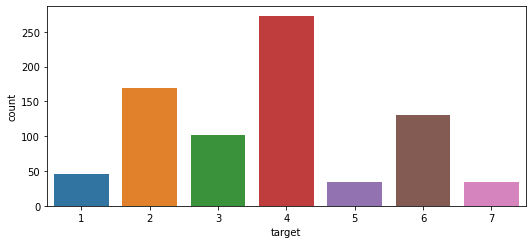

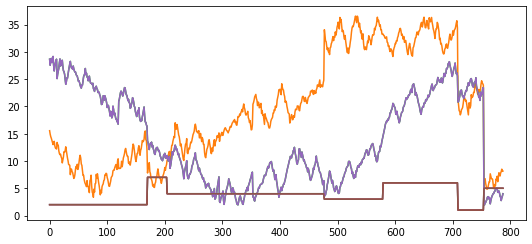

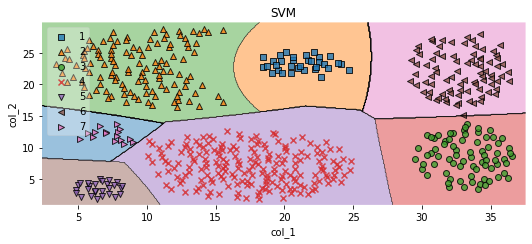

1.0
1.0
{'C': 0.2, 'gamma': 0.02, 'kernel': 'rbf'}


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


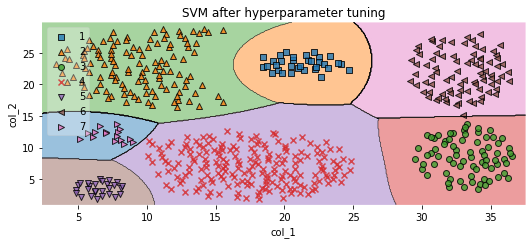

In [ ]:
svm(Aggregation_df)        #change between df1 to df8 to see diffrenent all classifications of all datasets

<Figure size 540x252 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy Score for default parameters:
0.925


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


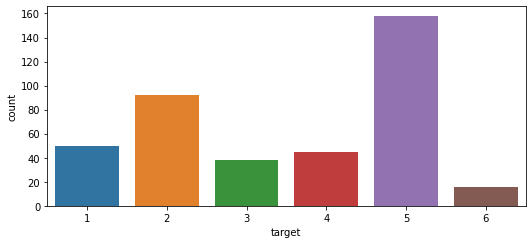

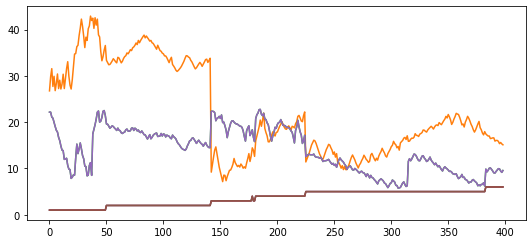

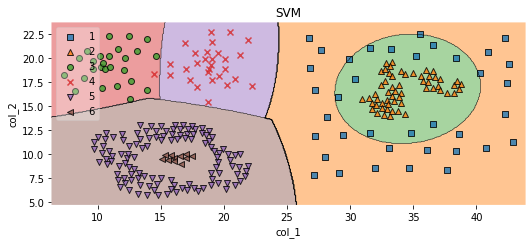

0.9714285714285713
0.9714285714285713
{'C': 0.9, 'gamma': 0.05, 'kernel': 'rbf'}


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


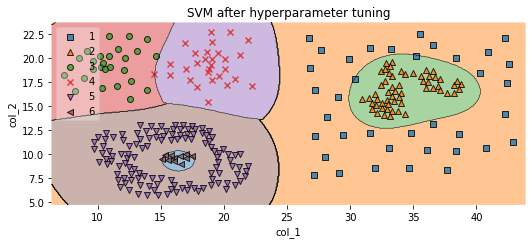

In [ ]:
svm(Compound_df)

<Figure size 540x252 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Accuracy Score for default parameters:
0.978494623655914


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


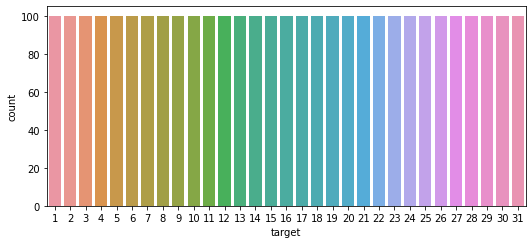

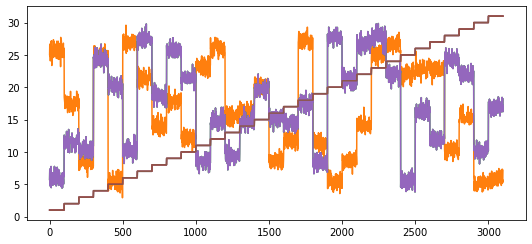

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


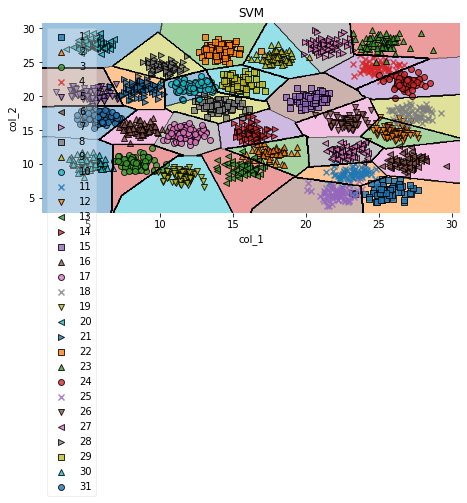

0.9751152073732718
0.9751152073732718
{'C': 0.1, 'gamma': 0.02, 'kernel': 'rbf'}


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


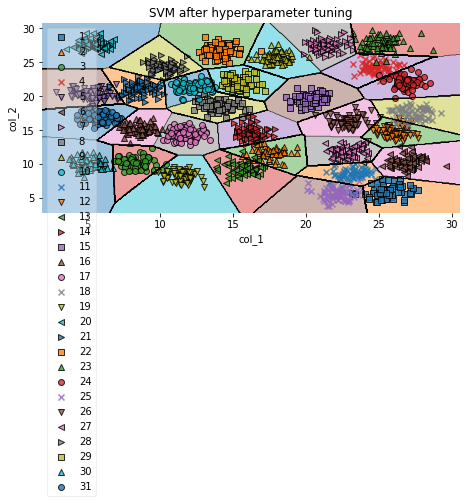

In [ ]:
svm(D31_df)

<Figure size 540x252 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Accuracy Score for default parameters:
0.9722222222222222


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


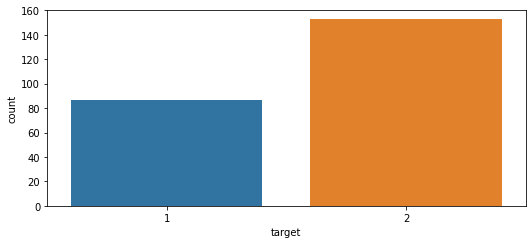

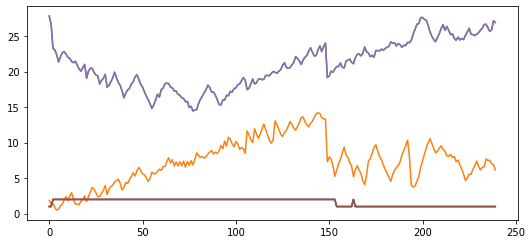

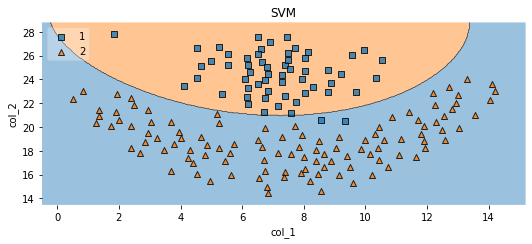

0.9878676470588236
0.9878676470588236
{'C': 0.30000000000000004, 'gamma': 0.02, 'kernel': 'rbf'}


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


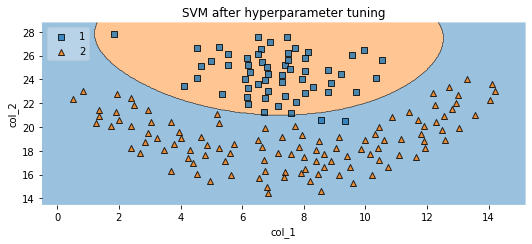

In [ ]:
svm(Flame_df)

<Figure size 540x252 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Accuracy Score for default parameters:
1.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


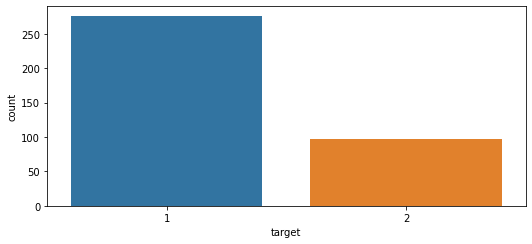

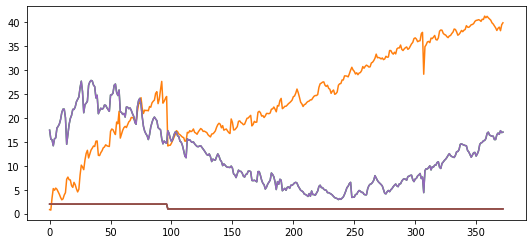

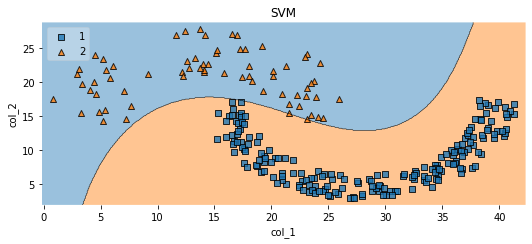

1.0
1.0
{'C': 0.1, 'gamma': 0.02, 'kernel': 'rbf'}


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


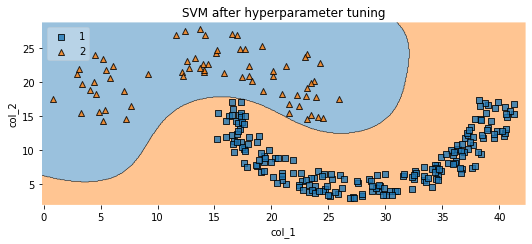

In [ ]:
svm(Jain_df)

<Figure size 540x252 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy Score for default parameters:
0.9888888888888889


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


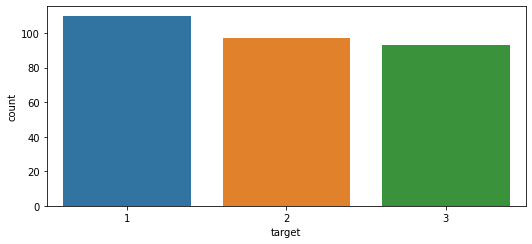

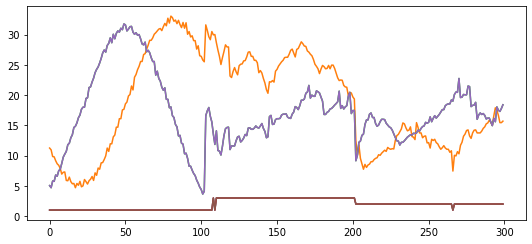

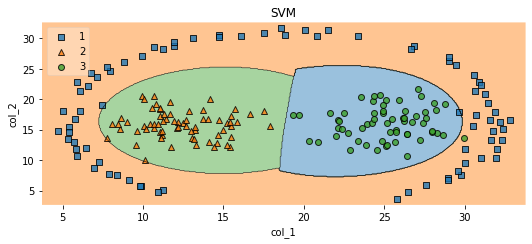

0.9904761904761905
0.9904761904761905
{'C': 0.8, 'gamma': 0.03, 'kernel': 'rbf'}


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


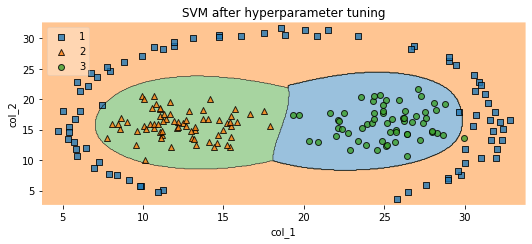

In [ ]:
svm(Pathbased_df)

<Figure size 540x252 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy Score for default parameters:
0.9944444444444445


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


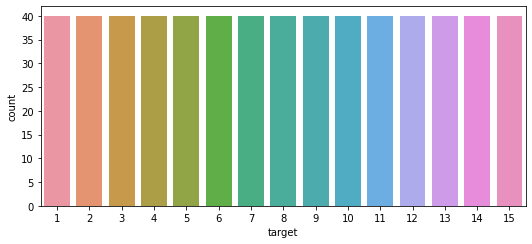

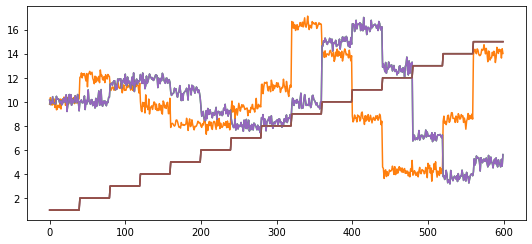

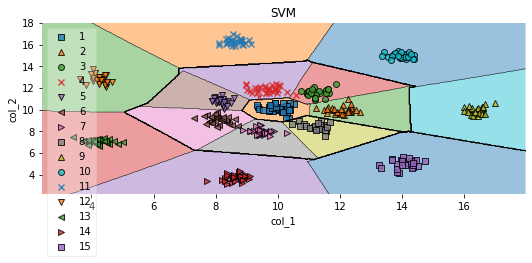

0.9976190476190476
0.9976190476190476
{'C': 0.4, 'gamma': 0.04, 'kernel': 'rbf'}


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


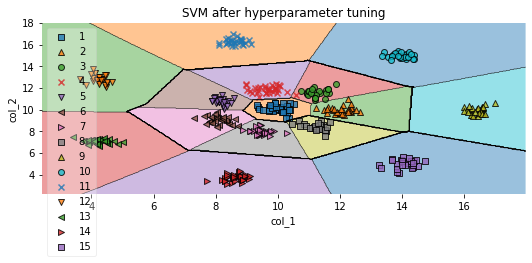

In [ ]:
svm(R15_df)